In [2]:
import tensorflow as tf
import nibabel as nib
import numpy as np
import os
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from scipy.ndimage import zoom, rotate, shift
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import nibabel as nib
import numpy as np
from skimage.transform import resize
import os

# Directories
healthy_directory = "nd/healthy/"
schiz_directory = "nd/schizophrenia/"
he_directory = "resized2/healthy/"
sz_directory = "resized2/schizophrenia/"

def resize_data(data, new_shape):
    # Resize each slice independently
    resized_slices = np.zeros((data.shape[0], new_shape[0], new_shape[1]))
    for i in range(data.shape[0]):
        resized_slices[i, :, :] = resize(data[i, :, :], new_shape, mode='reflect', anti_aliasing=True)
    return resized_slices

def process_and_resize_directory(input_directory, output_directory, slice_start, slice_end, new_shape):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    print(f"Listing files in directory: {input_directory}")
    files = os.listdir(input_directory)
    print(f"Files found: {files}")

    files_processed = False  # Flag to check if any file was processed

    for filename in files:
        if filename.endswith('.nii'):
            file_path = os.path.join(input_directory, filename)
            try:
                print(f"Processing file: {file_path}")

                # Load the NIfTI file
                img = nib.load(file_path)
                data = img.get_fdata()  # Get the image data as a NumPy array

                print(f"Original data shape: {data.shape}")

                # Extract middle slices
                middle_slices = data[slice_start:slice_end, :, :]

                # Resize each slice
                resized_slices = resize_data(middle_slices, new_shape)

                # Save the resized data
                new_file_path = os.path.join(output_directory, f"resized_{filename}")
                new_img = nib.Nifti1Image(resized_slices, img.affine)
                nib.save(new_img, new_file_path)
                print(f"Resized and saved {filename} to {new_file_path}")

                files_processed = True
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    if not files_processed:
        print(f"No files processed in directory: {input_directory}")

# Define the range of slices you want to extract
slice_start = 86
slice_end = 106  # Note that end is exclusive

# Define the new shape
new_shape = (128, 128)

# Process and resize both directories
process_and_resize_directory(healthy_directory, he_directory, slice_start, slice_end, new_shape)
process_and_resize_directory(schiz_directory, sz_directory, slice_start, slice_end, new_shape)

Listing files in directory: nd/healthy/
Files found: ['sub-101_T1w.nii', 'sub-102_T1w.nii', 'sub-10_T1w.nii', 'sub-11_T1w.nii', 'sub-12_T1w.nii', 'sub-13_T1w.nii', 'sub-14_T1w.nii', 'sub-15_T1w.nii', 'sub-16_T1w.nii', 'sub-20_T1w.nii', 'sub-35_T1w.nii', 'sub-36_T1w.nii', 'sub-37_T1w.nii', 'sub-38_T1w.nii', 'sub-43_T1w.nii', 'sub-46_T1w.nii', 'sub-47_T1w.nii', 'sub-49_T1w.nii', 'sub-50_T1w.nii', 'sub-51_T1w.nii', 'sub-53_T1w.nii', 'sub-54_T1w.nii', 'sub-55_T1w.nii', 'sub-56_T1w.nii', 'sub-57_T1w.nii', 'sub-58_T1w.nii', 'sub-59_T1w.nii', 'sub-64_T1w.nii', 'sub-65_T1w.nii', 'sub-69_T1w.nii', 'sub-72_T1w.nii', 'sub-73_T1w.nii', 'sub-81_T1w.nii', 'sub-87_T1w.nii', 'sub-88_T1w.nii', 'sub-89_T1w.nii', 'sub-90_T1w.nii', 'sub-97_T1w.nii', 'sub-98_T1w.nii', 'sub-A00000300_ses-20110101_acq-mprage_run-01_T1w.nii', 'sub-A00002198_ses-20110101_acq-mprage_run-01_T1w.nii', 'sub-A00003150_ses-20110101_acq-mprage_run-01_T1w.nii', 'sub-A00004087_ses-20100101_acq-mprage_run-04_T1w.nii', 'sub-A00007409_ses

Resized and saved sub-43_T1w.nii to resized2/healthy/resized_sub-43_T1w.nii
Processing file: nd/healthy/sub-46_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-46_T1w.nii to resized2/healthy/resized_sub-46_T1w.nii
Processing file: nd/healthy/sub-47_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-47_T1w.nii to resized2/healthy/resized_sub-47_T1w.nii
Processing file: nd/healthy/sub-49_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-49_T1w.nii to resized2/healthy/resized_sub-49_T1w.nii
Processing file: nd/healthy/sub-50_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-50_T1w.nii to resized2/healthy/resized_sub-50_T1w.nii
Processing file: nd/healthy/sub-51_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-51_T1w.nii to resized2/healthy/resized_sub-51_T1w.nii
Processing file: nd/healthy/sub-53_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-53_T1w.nii to resized2/healthy/resized_sub

Resized and saved sub-A00014522_ses-20100101_acq-mprage_run-02_T1w.nii to resized2/healthy/resized_sub-A00014522_ses-20100101_acq-mprage_run-02_T1w.nii
Processing file: nd/healthy/sub-A00014839_ses-20090101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00014839_ses-20090101_acq-mprage_run-02_T1w.nii to resized2/healthy/resized_sub-A00014839_ses-20090101_acq-mprage_run-02_T1w.nii
Processing file: nd/healthy/sub-A00014898_ses-20090101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00014898_ses-20090101_acq-mprage_run-02_T1w.nii to resized2/healthy/resized_sub-A00014898_ses-20090101_acq-mprage_run-02_T1w.nii
Processing file: nd/healthy/sub-A00015759_ses-20120101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00015759_ses-20120101_acq-mprage_run-02_T1w.nii to resized2/healthy/resized_sub-A00015759_ses-20120101_acq-mprage_run-02_T1w.nii
Processing file: nd/healthy/sub-A00015

Resized and saved sub-A00022837_ses-20090101_acq-mprage_run-01_T1w.nii to resized2/healthy/resized_sub-A00022837_ses-20090101_acq-mprage_run-01_T1w.nii
Processing file: nd/healthy/sub-A00022915_ses-20090101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00022915_ses-20090101_acq-mprage_run-01_T1w.nii to resized2/healthy/resized_sub-A00022915_ses-20090101_acq-mprage_run-01_T1w.nii
Processing file: nd/healthy/sub-A00023095_ses-20090101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00023095_ses-20090101_acq-mprage_run-01_T1w.nii to resized2/healthy/resized_sub-A00023095_ses-20090101_acq-mprage_run-01_T1w.nii
Processing file: nd/healthy/sub-A00023120_ses-20090101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00023120_ses-20090101_acq-mprage_run-02_T1w.nii to resized2/healthy/resized_sub-A00023120_ses-20090101_acq-mprage_run-02_T1w.nii
Processing file: nd/healthy/sub-A00023

Resized and saved sub-A00029452_ses-20120101_acq-mprage_run-02_T1w.nii to resized2/healthy/resized_sub-A00029452_ses-20120101_acq-mprage_run-02_T1w.nii
Processing file: nd/healthy/sub-A00031478_ses-20120101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00031478_ses-20120101_acq-mprage_run-01_T1w.nii to resized2/healthy/resized_sub-A00031478_ses-20120101_acq-mprage_run-01_T1w.nii
Processing file: nd/healthy/sub-A00031764_ses-20120101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00031764_ses-20120101_acq-mprage_run-01_T1w.nii to resized2/healthy/resized_sub-A00031764_ses-20120101_acq-mprage_run-01_T1w.nii
Processing file: nd/healthy/sub-A00033214_ses-20120101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00033214_ses-20120101_acq-mprage_run-01_T1w.nii to resized2/healthy/resized_sub-A00033214_ses-20120101_acq-mprage_run-01_T1w.nii
Processing file: nd/healthy/sub-A00035

Resized and saved sub-01_T1w.nii to resized2/schizophrenia/resized_sub-01_T1w.nii
Processing file: nd/schizophrenia/sub-02_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-02_T1w.nii to resized2/schizophrenia/resized_sub-02_T1w.nii
Processing file: nd/schizophrenia/sub-03_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-03_T1w.nii to resized2/schizophrenia/resized_sub-03_T1w.nii
Processing file: nd/schizophrenia/sub-04_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-04_T1w.nii to resized2/schizophrenia/resized_sub-04_T1w.nii
Processing file: nd/schizophrenia/sub-05_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-05_T1w.nii to resized2/schizophrenia/resized_sub-05_T1w.nii
Processing file: nd/schizophrenia/sub-06_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-06_T1w.nii to resized2/schizophrenia/resized_sub-06_T1w.nii
Processing file: nd/schizophrenia/sub-07_T1w.nii
Original data shape: (176, 25

Resized and saved sub-85_T1w.nii to resized2/schizophrenia/resized_sub-85_T1w.nii
Processing file: nd/schizophrenia/sub-86_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-86_T1w.nii to resized2/schizophrenia/resized_sub-86_T1w.nii
Processing file: nd/schizophrenia/sub-91_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-91_T1w.nii to resized2/schizophrenia/resized_sub-91_T1w.nii
Processing file: nd/schizophrenia/sub-92_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-92_T1w.nii to resized2/schizophrenia/resized_sub-92_T1w.nii
Processing file: nd/schizophrenia/sub-93_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-93_T1w.nii to resized2/schizophrenia/resized_sub-93_T1w.nii
Processing file: nd/schizophrenia/sub-94_T1w.nii
Original data shape: (176, 256, 256)
Resized and saved sub-94_T1w.nii to resized2/schizophrenia/resized_sub-94_T1w.nii
Processing file: nd/schizophrenia/sub-95_T1w.nii
Original data shape: (176, 25

Resized and saved sub-A00015648_ses-20110101_acq-mprage_run-01_T1w.nii to resized2/schizophrenia/resized_sub-A00015648_ses-20110101_acq-mprage_run-01_T1w.nii
Processing file: nd/schizophrenia/sub-A00016197_ses-20090101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00016197_ses-20090101_acq-mprage_run-01_T1w.nii to resized2/schizophrenia/resized_sub-A00016197_ses-20090101_acq-mprage_run-01_T1w.nii
Processing file: nd/schizophrenia/sub-A00016720_ses-20110101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00016720_ses-20110101_acq-mprage_run-02_T1w.nii to resized2/schizophrenia/resized_sub-A00016720_ses-20110101_acq-mprage_run-02_T1w.nii
Processing file: nd/schizophrenia/sub-A00016723_ses-20100101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00016723_ses-20100101_acq-mprage_run-02_T1w.nii to resized2/schizophrenia/resized_sub-A00016723_ses-20100101_acq-mprage_run-02_T1w.

Resized and saved sub-A00027410_ses-20120101_acq-mprage_run-01_T1w.nii to resized2/schizophrenia/resized_sub-A00027410_ses-20120101_acq-mprage_run-01_T1w.nii
Processing file: nd/schizophrenia/sub-A00027537_ses-20110101_acq-mprage_run-02_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00027537_ses-20110101_acq-mprage_run-02_T1w.nii to resized2/schizophrenia/resized_sub-A00027537_ses-20110101_acq-mprage_run-02_T1w.nii
Processing file: nd/schizophrenia/sub-A00027616_ses-20090101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00027616_ses-20090101_acq-mprage_run-01_T1w.nii to resized2/schizophrenia/resized_sub-A00027616_ses-20090101_acq-mprage_run-01_T1w.nii
Processing file: nd/schizophrenia/sub-A00028303_ses-20120101_acq-mprage_run-01_T1w.nii
Original data shape: (192, 256, 256)
Resized and saved sub-A00028303_ses-20120101_acq-mprage_run-01_T1w.nii to resized2/schizophrenia/resized_sub-A00028303_ses-20120101_acq-mprage_run-01_T1w.

In [4]:
import albumentations as A
import nibabel as nib
import numpy as np
import os
from sklearn.utils import shuffle
from albumentations.pytorch import ToTensorV2

# Directories
he_directory = "resized/healthy/"
sz_directory = "resized/schizophrenia/"

# Augmentation pipeline
def get_augmentation_pipeline():
    return A.Compose([
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.RandomGamma(gamma_limit=(80, 120), p=0.5),
        A.Resize(height=128, width=128),  # Resize to a common shape if needed
        ToTensorV2()  # Convert to PyTorch tensors if using PyTorch
    ])

def load_images_and_labels(directory, label, augmentation=None):
    files = [f for f in os.listdir(directory) if f.endswith('.nii')]
    images = []
    for file in files:
        file_path = os.path.join(directory, file)
        img = nib.load(file_path)
        data = img.get_fdata()

        # Apply augmentation if provided
        if augmentation:
            for i in range(data.shape[0]):  # Apply augmentation to each slice
                augmented = augmentation(image=data[i])
                images.append(augmented['image'])
        else:
            images.extend(data)

    return np.array(images), np.full(len(images), label)

# Define augmentation pipeline
augmentation_pipeline = get_augmentation_pipeline()

# Load and augment data
S_healthy_images, healthy_labels = load_images_and_labels(he_directory, 0, augmentation=augmentation_pipeline)
S_schiz_images, schiz_labels = load_images_and_labels(sz_directory, 1, augmentation=augmentation_pipeline)

# Concatenate the healthy and diseased data into a single array
S_data = np.concatenate((S_healthy_images, S_schiz_images), axis=0)
S_labels = np.concatenate((healthy_labels, schiz_labels), axis=0)

# Shuffle the data and labels together
S_data, S_labels = shuffle(S_data, S_labels, random_state=42)

# Split the data and labels into training and testing sets
split_index = int(len(S_data) * 0.8)  # 80% for training

S_train_data = S_data[:split_index]
S_test_data = S_data[split_index:]
S_train_labels = S_labels[:split_index]
S_test_labels = S_labels[split_index:]

print(f"Training data shape: {S_train_data.shape}")
print(f"Testing data shape: {S_test_data.shape}")
print(f"Training labels shape: {S_train_labels.shape}")
print(f"Testing labels shape: {S_test_labels.shape}")

Training data shape: (4272, 1, 128, 128)
Testing data shape: (1068, 1, 128, 128)
Training labels shape: (4272,)
Testing labels shape: (1068,)


Processing Fold 1/5


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.5190 - loss: 11.8085
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.5630 - loss: 0.6820
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.5910 - loss: 0.6605
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.6185 - loss: 0.6396
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.6480 - loss: 0.6322
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.6398 - loss: 0.6165
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.6492 - loss: 0.5938
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.6426 - loss: 0.5944
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.6495 - loss: 0.5857
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - accuracy: 0.6641 - loss: 0.5706
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
Processing Fold 2/5


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.5275 - loss: 17.0419
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.5807 - loss: 0.6766
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.5804 - loss: 0.6640
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.6026 - loss: 0.6437
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.6282 - loss: 0.6298
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.6425 - loss: 0.6028
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - accuracy: 0.6687 - loss: 0.5853
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 178ms/step - accuracy: 0.6719 - loss: 0.5617
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.7022 - loss: 0.5442
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 39s 289ms/step - accuracy: 0.7135 - loss: 0.5041
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step
Processing Fold 3/5


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 91s 508ms/step - accuracy: 0.5203 - loss: 7.9957
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 66s 492ms/step - accuracy: 0.5833 - loss: 0.6799
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 66s 490ms/step - accuracy: 0.5896 - loss: 0.6602
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.6118 - loss: 0.6426
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.6237 - loss: 0.6243
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - accuracy: 0.6337 - loss: 0.6116
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - accuracy: 0.6386 - loss: 0.6002
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.6717 - loss: 0.5782
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.6680 - loss: 0.5651
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 31s 230ms/step - accuracy: 0.6763 - loss: 0.5515
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step
Processing Fold 4/5


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 61s 250ms/step - accuracy: 0.5137 - loss: 16.7689
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.5419 - loss: 0.6807
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - accuracy: 0.5803 - loss: 0.6593
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 22s 167ms/step - accuracy: 0.6211 - loss: 0.6390
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.6265 - loss: 0.6233
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.6344 - loss: 0.6140
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.6561 - loss: 0.5831
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.6740 - loss: 0.5621
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - accuracy: 0.6873 - loss: 0.5605
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.6738 - loss: 0.5462
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
Processing Fold 5/5


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - accuracy: 0.5373 - loss: 14.3324
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.5704 - loss: 0.6725
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.5862 - loss: 0.6533
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.5878 - loss: 0.6531
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 178ms/step - accuracy: 0.6113 - loss: 0.6352
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.6316 - loss: 0.6204
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.6387 - loss: 0.6095
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.6447 - loss: 0.5920
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.6630 - loss: 0.5701
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.6649 - loss: 0.5858
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
Average Accuracy: 0.6270


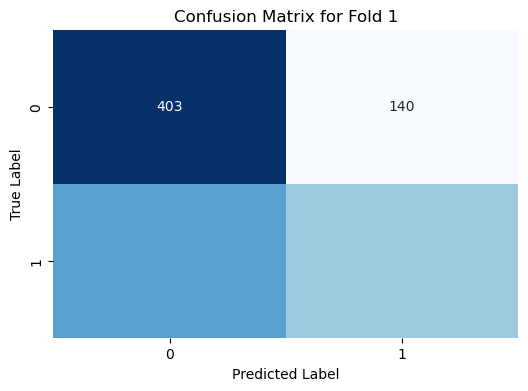

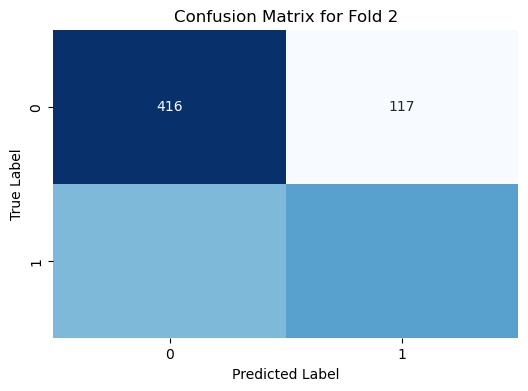

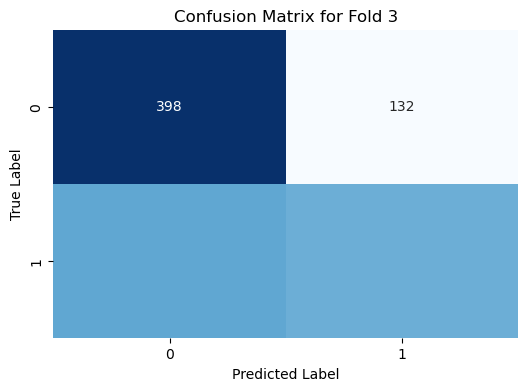

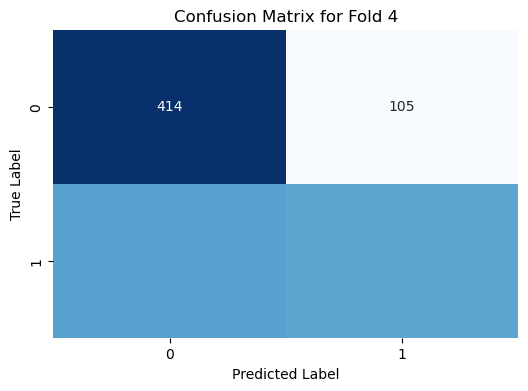

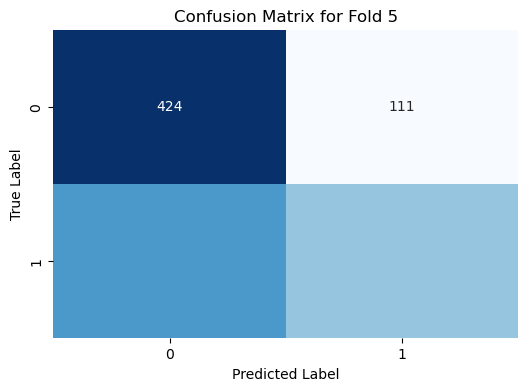

In [5]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

def create_3d_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv3D(filters=32, kernel_size=(1, 3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))
    
    model.add(layers.Conv3D(filters=64, kernel_size=(1, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))
    
    model.add(layers.Conv3D(filters=128, kernel_size=(1, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def cross_validate_3d_cnn(S_data, S_labels, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_no = 1
    all_scores = []
    all_confusion_matrices = []
    
    for train_index, val_index in kf.split(S_data):
        print(f"Processing Fold {fold_no}/{n_splits}")
        
        # Split data
        X_train, X_val = S_data[train_index], S_data[val_index]
        y_train, y_val = S_labels[train_index], S_labels[val_index]
        
        # Compute class weights
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(enumerate(class_weights))
        
        # Create and train model
        model = create_3d_cnn_model(input_shape=(1, 128, 128, 1))
        model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weight_dict, verbose=1)
        
        # Evaluate model
        y_pred = model.predict(X_val)
        y_pred_labels = (y_pred > 0.5).astype(int)
        
        # Compute scores
        score = model.evaluate(X_val, y_val, verbose=0)
        all_scores.append(score[1])  # accuracy is at index 1
        
        # Compute confusion matrix
        cm = confusion_matrix(y_val, y_pred_labels)
        all_confusion_matrices.append(cm)
        
        fold_no += 1
    
    # Average the scores
    avg_score = np.mean(all_scores)
    print(f"Average Accuracy: {avg_score:.4f}")
    
    # Display confusion matrices
    for i, cm in enumerate(all_confusion_matrices, 1):
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for Fold {i}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Assuming S_data and S_labels are already defined
cross_validate_3d_cnn(S_data, S_labels, n_splits=5)


In [6]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(S_train_labels), y=S_train_labels)
class_weight_dict = dict(enumerate(class_weights))

# Compile the model (no class_weight here)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(S_train_data, S_train_labels, epochs=10, batch_size=32, class_weight=class_weight_dict)


NameError: name 'model' is not defined

In [ ]:
 #Save the model
model.save('resized/h1.h5')
model.save('resized/h2.keras')

# Load the model (example)
loaded_model_h5 = tf.keras.models.load_model('resized/h1.h5')
loaded_model_keras = tf.keras.models.load_model('resized/h2.keras')

In [7]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test data
S_test_predictions = model.predict(S_test_data)

# Convert predictions to binary class labels if not already done
S_test_predictions_binary = (S_test_predictions > 0.5).astype(int)  # Assuming binary classification

# Calculate accuracy
accuracy = accuracy_score(S_test_labels, S_test_predictions_binary)
print(f"Test Accuracy: {accuracy:.4f}")


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels (S_test_labels) and predictions (S_test_predictions)
S_test_predictions_binary = (S_test_predictions > 0.5).astype(int)  # Convert to binary if needed

# Compute confusion matrix
conf_matrix = confusion_matrix(S_test_labels, S_test_predictions_binary)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(S_test_labels, S_test_predictions)

# Compute AUC
roc_auc = roc_auc_score(S_test_labels, S_test_predictions)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(S_test_labels, S_test_predictions_binary)
print(f"Accuracy: {accuracy:.4f}")
